<a href="https://colab.research.google.com/github/felipemoisesk/101-Analytics-Engineer-Test-Ecommerce2/blob/main/main_pt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **101-Analytics-Engineer-Test-Ecommerce2**
> *Desenvolvido por Felipe Möises*





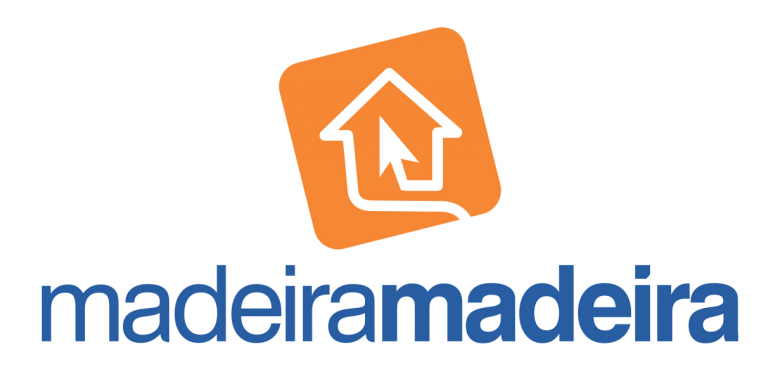

## **A. Entendendo o Negócio:**

Nesta etapa serão estudados os objetivos do negócio, avaliada a situação negócio (quais problemas a serem resolvidos?), bem como determinado os objetivos para o projeto de Analytics Engineer (quais são os passos do ETL, modelagem dimensional de dados, construção de dashboards?)

### **A1. Contextualização do Negócio**

MadeiraMadeira (ou Madeira Madeira) é uma varejista online de bens para o lar, fundada em 2009 na cidade de São José dos Pinhais, PR, por Daniel Scandian e Marcelo Scandian, que oferece em sua loja online Móveis, Material de Construção, Decoração, Eletrodomésticos, Eletrônicos e Jardinagem, atuando com modelo de negócios baseado em Drop shipping e Marketplace.

Sua sede foi posteriormente alterada para a cidade de Curitiba, PR.

A MadeiraMadeira é a 23ª colocada no Ranking 30 Maiores E-commerces do Brasil (número de acessos), segundo Relatório Conversion E-commerce no Brasil Fevereiro/2022. No período foram contabilizados 14.835.941 de acessos.

### **A2. Quais os problemas a serem resolvidos?**

O presente projeto busca-se resolver os seguintes problemas a partir de uma base de dados fornecida pela empresa:

- Leitura e tratamento dos dados do banco com python;
- Criação de um banco e uma tabela de acordo com excel em anexo localmente;
- Utilizar uma ferramenta de visualização a sua escolha para ilustrar seus insights;
- Extrair da base 3 insights que considere relevante para o negócio.


## **B. Entendendo os Dados**

Nesta etapa estaremos coletando os dados iniciais, descrevendo os referidos dados, bem como explorando os dados e verificando a qualidade de dados, para que por fim possamos realizar a modelagem dimensional dos dados e disponibilizá-los em um banco de dados localmente.

### **B1.Coletando os dados iniciais**

Foi enviado uma amostra dos dados transacionais em formato xlsx para resolução do case.

Dessa forma, foi foi utilizado a Sheet1 do arquivo (base_vendas_2020.xlsx).

In [ ]:
# Carregando os pacotes do Python necessários à execução do case para a vaga de Analytics Engineer.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas._libs import index

In [ ]:
# Carregando o dataset com a amostra de dados transacionais

base = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MadeiraMadeira/base_vendas_2020.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### **B2. Descrevendo os dados**

Nessa etapa os dados são descritos com objetivo de conhecermos seu formato, os tipos de variáveis (numéricas ou categóricas), assim como aspectos gerais úteis ao entendimento geral e resolução do problema.

In [ ]:
# Conhecendo as informações gerais do dataset.

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   data_compra_date    5000 non-null   object 
 1   id_pedido           5000 non-null   int64  
 2   id_produto          4996 non-null   float64
 3   entrega_uf          5000 non-null   object 
 4   receita_frete       5000 non-null   float64
 5   receita_produto     5000 non-null   float64
 6   quantidade_produto  5000 non-null   float64
 7   situacao            5000 non-null   object 
 8   tipo_venda          5000 non-null   object 
 9   canal               5000 non-null   object 
 10  desconto_produto    5000 non-null   float64
 11  receita_total       5000 non-null   float64
 12  nome_produto        4996 non-null   object 
 13  categoria           4993 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 547.0+ KB


Em uma análise inicial encontramos um dataset com 5000 linhas, entradas, e um total de 14 colunas. Neste ponto, acredito ser importante a construção de um dicionário com o descritivo das colunas para melhor compreensão do problema geral e auxílio posterior. No método acima, conseguimos também identificar o tipo das colunas do dataset: inteiras, float, objetos. Esta informação irá auxiliar na criação das tabelas fato e dimensão no banco de dados.

Neste momento, já faremos as trasnformações de tipo de variável id_pedido e id_produto.

In [ ]:
# Alterando o tipo de variável nas colunas id_pedido, id_produto e data_compra_date

base[['id_pedido', 'id_produto']] = base[['id_pedido', 'id_produto']].astype(str)
base['data_compra_date'] = pd.to_datetime(base['data_compra_date'])

In [ ]:
# (re)Conhecendo as informações gerais do dataset após ajustes de tipo de variável.

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   data_compra_date    5000 non-null   datetime64[ns]
 1   id_pedido           5000 non-null   object        
 2   id_produto          5000 non-null   object        
 3   entrega_uf          5000 non-null   object        
 4   receita_frete       5000 non-null   float64       
 5   receita_produto     5000 non-null   float64       
 6   quantidade_produto  5000 non-null   float64       
 7   situacao            5000 non-null   object        
 8   tipo_venda          5000 non-null   object        
 9   canal               5000 non-null   object        
 10  desconto_produto    5000 non-null   float64       
 11  receita_total       5000 non-null   float64       
 12  nome_produto        4996 non-null   object        
 13  categoria           4993 non-null   object      

Notamos que os valores que estavam faltando em id_produto não estão mais apontados, entretanto estes campos continuam sem preenchimento, com valores nan (vazio).

**Dicionário das variáveis**

 - data_compra_date: data da compra.
 - id_pedido: número de identificação gerado para identificar o pedido.
 - id_produto: número de identificação gerado para identificar o produto.
 - entrega_uf: unidade federativa (estado) que o produto foi entregue.
 - receita_frete: valor arrecadado do transporte/frete entre a fábrica/loja até o destino.
 - receita_produto: valor nominal do produto.
 - quantidade_produto: quantidade vendida do produto.
 - situacao: status que a compra encontra-se (Aprovado, Cancelado, Em Aprovação).
 - tipo_venda: tipo da venda.
 - canal: canal de venda que a compra foi realizada.
 - desconto_produto: valor de desconto ofertado
 - receita_total: [receita_frete + receita_produto + desconto_produto].
 - nome_produto: nome do produto no portfólio, descritivo.
 - categoria: categoria que o produto se enquadra

Nesta etapa, visualizaremos a estrutura do dataset com suas linhas e colunas dispostas em forma tabular (Data Frame).

In [ ]:
display(base)

,data_compra_date,id_pedido,id_produto,entrega_uf,receita_frete,receita_produto,quantidade_produto,situacao,tipo_venda,canal,desconto_produto,receita_total,nome_produto,categoria
0,2020-01-30,7830233,544113.0,PR,36.860001,180.899994,1.0,Aprovado,1P,MM,-14.170000,203.589995,Escrivaninha Cavalete 4 Prateleiras Hawaii Yes...,Escrivaninhas
1,2020-01-06,7521840,148376.0,SP,29.059999,469.899994,1.0,Aprovado,1P,B2W,-46.990002,451.969992,Conjunto Sala de Jantar Mesa Tampo de Vidro e ...,Conjuntos de Mesas e Cadeiras de Jantar
2,2020-01-29,7824799,280052.0,SP,86.089996,399.899994,1.0,Aprovado,1P,Carrefour,0.000000,485.989990,Armário de Cozinha 12 Portas 1 Gaveta Clara Po...,Armários de Cozinha
3,2020-01-23,7761090,553063.0,MG,108.980003,959.900024,1.0,Cancelado,1P,MM,0.000000,1068.880028,Penteadeira Camarim Retrô com LED 5 Gavetas Ne...,Penteadeiras
4,2020-01-14,7644963,1175243.0,SP,16.080000,142.000000,1.0,Aprovado,3P,MM,0.000000,158.080000,Quadro Abstrato Decorativo - 57x120cm,Quadros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020-01-28,7808237,555380.0,SP,59.310001,209.899994,1.0,Aprovado,1P,Magazine Luiza,0.000000,269.209995,Berço Mini Cama 2 em 1 Espresso Móveis,Berços
4996,2020-01-29,7820782,274736.0,SP,28.330000,144.050003,1.0,Aprovado,1P,MM,0.000000,172.379997,Escrivaninha com 4 Nichos Matrix Artely,Escrivaninhas
4997,2020-01-16,7675804,1671074.0,AL,33.299999,439.000000,1.0,Cancelado,3P,MM,0.000000,472.299999,Bebedouro Philco PBE03BQF Água Quente E Gelada...,Bebedouros
4998,2020-01-23,7755286,435589.0,SP,36.959999,219.899994,1.0,Aprovado,1P,MM,-11.000000,245.859993,Escrivaninha 2 Gavetas com Chave 120cm Taurus ...,Escrivaninhas


### **B3.Estatísticas Descritivas**

Conhecendo a estrutura dos dados, exploraremos um pouco mais a qualidade destes dados aplicando algumas técnicas de estatística descritiva, com especial atenção para identificação de valores faltantes, presença de outliers, análise de correlações entre as variáveis, dentre outras questões relevantes nesta fase inicial.

In [ ]:
# Cálculo absoluto de dados faltantes no dataset.

base.isnull().sum()

data_compra_date      0
id_pedido             0
id_produto            0
entrega_uf            0
receita_frete         0
receita_produto       0
quantidade_produto    0
situacao              0
tipo_venda            0
canal                 0
desconto_produto      0
receita_total         0
nome_produto          4
categoria             7
dtype: int64

In [ ]:
# Leitura e identificação de linhas com valores faltantes no dataset.

base[base.isnull().any(axis=1)]

,data_compra_date,id_pedido,id_produto,entrega_uf,receita_frete,receita_produto,quantidade_produto,situacao,tipo_venda,canal,desconto_produto,receita_total,nome_produto,categoria
382,2020-01-11,7606190,nan,RJ,129.899994,1399.000000,1.0,Aprovado,3P,MM,0.0,1528.899994,NaN,NaN
388,2020-01-13,7627197,nan,MG,89.900002,1699.000000,1.0,Aprovado,3P,MM,0.0,1788.900002,NaN,NaN
489,2020-01-28,7806027,1996796.0,SP,79.900002,531.200012,1.0,Cancelado,3P,MM,0.0,611.100014,Aparador Retrô com Espelhos e 1 Gaveta MDF - F...,NaN
1381,2020-01-14,7645366,nan,SC,89.900002,1399.000000,1.0,Aprovado,3P,MM,0.0,1488.900002,NaN,NaN
2188,2020-01-27,7794431,1786265.0,SC,55.000000,189.910004,1.0,Cancelado,3P,MM,0.0,244.910004,Kit Mesa Bistrô Preto Tampo Branco 2 Banquetas...,NaN
2291,2020-01-13,7635231,nan,SC,89.900002,1399.000000,1.0,Aprovado,3P,MM,0.0,1488.900002,NaN,NaN
3496,2020-01-29,7823570,1900948.0,SP,99.000000,499.000000,1.0,Cancelado,3P,MM,0.0,598.000000,"Expositor Armario Nichos,Cabideiro Loja Ana Br...",NaN


**Quanto à questão de dados faltantes, em uma breve verificação podemos identificar que:**

- Há 4 (0,08%) pedidos em que as colunas **id_produto**, **nome_produto** e **categoria** possuem valores faltantes.

- ☝ Notamos que todas as linhas que faltam informações em **id_produto** também faltam em nome_produto e categoria, **possivelmente há uma correlação no não-preenchimento dos campos**. Necessidade de verificar com o time responsável pela catalogação estes produtos através de bases internas ou mesmo utilizando o **id_pedido** o erro ocorrido.

- Há também 3 outros pedidos que não possuem informações sobre **categoria**, mesmo que seus campos **id_produto** e **nome_produto** estejam completos. Coincidentemente estes produtos possuem situação CANCELADA.

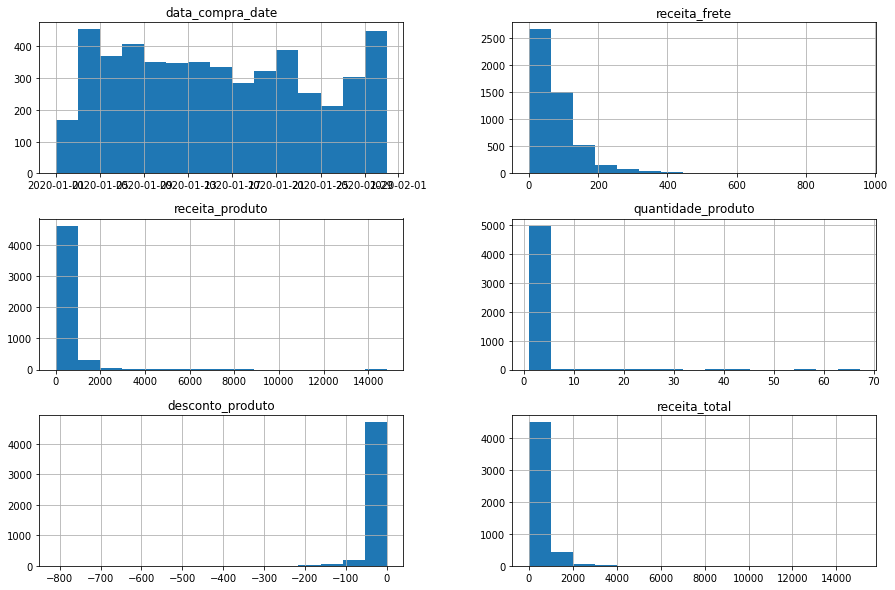

In [ ]:
# Contrução dos histogramas das variáveis do dataset.

base.hist(bins=15, figsize=(15,10));

**Sobre identificação de outliers**

Pela distribuição dos histogramas, não há nada que chama atenção.

Mesmo assim, vale descrever os dados para validar o pensamento.

In [ ]:
# Construindo os resumos estatísticos das variáveis numéricas usando a função describe.

base.describe()

,receita_frete,receita_produto,quantidade_produto,desconto_produto,receita_total
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,77.517390,433.977384,1.207200,-10.224734,501.500867
std,72.740528,517.514200,1.750708,32.934377,546.297410
min,0.000000,13.480000,1.000000,-809.434588,14.980000
25%,32.737500,159.000000,1.000000,0.000000,203.509995
50%,59.760000,289.899994,1.000000,0.000000,346.869993
75%,99.000000,539.799988,1.000000,0.000000,620.187519
max,955.280029,14827.000000,67.199997,0.000000,15060.009995


☝ Nota-se que em **quantidade_produto** há numeros não inteiros, o que pode gerar dúvidas e análises difusas como produtos (Rodapé MDF) que são vendidos por m, não convertidos para caixa. Sendo assim, necessário melhor entendimento junto ao time de catálogo e negócio para melhor aferição.

**A respeito do resumo das estatísticas das variáveis numéricas do dataset, podemos explorar:**


- 75% dos fretes estão abaixo dos R$ 99,00. Porém existe um valor máximo de frete 10x maior que isto. Interessante verificar pois ele puxa a média muito pra cima;
- A coluna **quantidade_produto** está com valor máximo quebrado, remetendo aao que faos cima sobre alguns produtos serem vendidos por metro e não unidade;
- Outras variáveis com interferências de outliers.


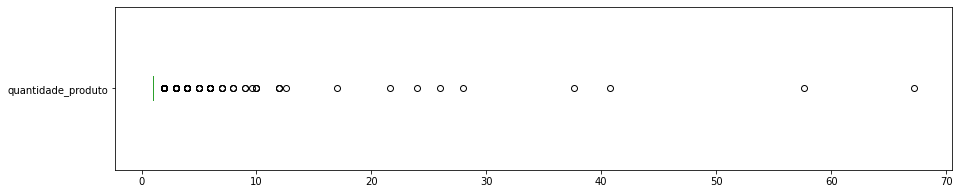

quantidade_produto: valores acima de 1:
419 entradas
8.3800%


In [ ]:
# Construção do Boxplot para variável quantidade_produto.

base.quantidade_produto.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Verificar a quantidade de valores acima de 1 unidade para variável quantidade_produto.

print("quantidade_produto: valores acima de 1:")
print("{} entradas".format(len(base[base.quantidade_produto > 1])))
print("{:.4f}%".format((len(base[base.quantidade_produto > 1]) / base.shape[0])*100))

**A respeito da construção dos Boxplots para verificar a presença de outliers, podemos podemos explorar:**


- Há 419 entradas (8.38%) que possui venda maior que 1 unidade. Visto que a empresa atua em um negócio onde 75% das vendas são unitárias, podemos explorar um pouco mais e entender o que são estes produtos e identificar outliers a fim de corrigí-los.

## **C. Preparando os Dados**
Nesta etapa, o código será responsável por limpar, integrar, formatar, caso necessário, e até mesmo construir dados, para que tenhamos tabelas fato e dimensão que irão compor o banco de dados.

A princípio, como podemos ver abaixo, os tipos das variáveis estão corretos devido alteração realizada na etapa **B2**.

### **C1. Limpeza dos Dados**

Na etapa C1 removeremos as linhas que possuem algum campo NaN. 

Neste momento também, tem-se uma inferência e recomendação para estes problemas qualitativos na base de dados.

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   data_compra_date    5000 non-null   datetime64[ns]
 1   id_pedido           5000 non-null   object        
 2   id_produto          5000 non-null   object        
 3   entrega_uf          5000 non-null   object        
 4   receita_frete       5000 non-null   float64       
 5   receita_produto     5000 non-null   float64       
 6   quantidade_produto  5000 non-null   float64       
 7   situacao            5000 non-null   object        
 8   tipo_venda          5000 non-null   object        
 9   canal               5000 non-null   object        
 10  desconto_produto    5000 non-null   float64       
 11  receita_total       5000 non-null   float64       
 12  nome_produto        4996 non-null   object        
 13  categoria           4993 non-null   object      

Em relação a presença de valores NaN contidos em alguns pedidos (7606190, 7627197, 7806027, 7645366, 7794431, 7635231, 7823570), preferi EXCLUIR os valores neste momento.

☝ Vale ressaltar, mais uma vez, que a recomendação final é que seja investigado junto ao time responsável pela catalogação dos produtos presente nestes **id_pedidos** para que assim a base fique mais fidedigna possível. Outro ponto a ser investigado com o time responsável é a questão de produtos que são vendidos por metro/centímetro serem contabilizados na coluna **quatidade_produto** de tal forma, e não de maneira unitária conforme 99% do portfólio de produtos. A ausência desta padronização, por exemplo, impossibilita a criação e análise do KPI *ticket_medio*, por exemplo.

In [ ]:
# Remover linhas que contém valores NaN e construção de um novo dataset.

base_clean = base.copy()
base_clean = base_clean.dropna()
base_clean.reset_index(drop=True, inplace=True)

In [ ]:
# (re)Conhecendo as informações gerais do dataset após remoção linhas com valores NaN.

base_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4993 entries, 0 to 4992
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   data_compra_date    4993 non-null   datetime64[ns]
 1   id_pedido           4993 non-null   object        
 2   id_produto          4993 non-null   object        
 3   entrega_uf          4993 non-null   object        
 4   receita_frete       4993 non-null   float64       
 5   receita_produto     4993 non-null   float64       
 6   quantidade_produto  4993 non-null   float64       
 7   situacao            4993 non-null   object        
 8   tipo_venda          4993 non-null   object        
 9   canal               4993 non-null   object        
 10  desconto_produto    4993 non-null   float64       
 11  receita_total       4993 non-null   float64       
 12  nome_produto        4993 non-null   object        
 13  categoria           4993 non-null   object      

### **C2. Criando Tabelas Fato e Dimensão**

A modelagem dimensional de dados é uma das etapas mais importantes na criação de um DW, DL ou BD.

Sendo assim, nesta seção iremos criar a Tabela Fato e as Tabelas Dimensão.

In [41]:
# Criação Tabela Fato Base de Vendas (fat_basevendas) 

fat_basevendas = base_clean.copy()
fat_basevendas = fat_basevendas.drop(columns=['situacao', 'tipo_venda', 'nome_produto', 'categoria', 'canal'])
fat_basevendas.reset_index(drop=True, inplace=True)

fat_basevendas

,data_compra_date,id_pedido,id_produto,entrega_uf,receita_frete,receita_produto,quantidade_produto,desconto_produto,receita_total
0,2020-01-30,7830233,544113.0,PR,36.860001,180.899994,1.0,-14.170000,203.589995
1,2020-01-06,7521840,148376.0,SP,29.059999,469.899994,1.0,-46.990002,451.969992
2,2020-01-29,7824799,280052.0,SP,86.089996,399.899994,1.0,0.000000,485.989990
3,2020-01-23,7761090,553063.0,MG,108.980003,959.900024,1.0,0.000000,1068.880028
4,2020-01-14,7644963,1175243.0,SP,16.080000,142.000000,1.0,0.000000,158.080000
...,...,...,...,...,...,...,...,...,...
4988,2020-01-28,7808237,555380.0,SP,59.310001,209.899994,1.0,0.000000,269.209995
4989,2020-01-29,7820782,274736.0,SP,28.330000,144.050003,1.0,0.000000,172.379997
4990,2020-01-16,7675804,1671074.0,AL,33.299999,439.000000,1.0,0.000000,472.299999
4991,2020-01-23,7755286,435589.0,SP,36.959999,219.899994,1.0,-11.000000,245.859993


In [ ]:
# Criação Tabela Dimensão Calendário (dim_calendario) 

dim_calendario = base_clean.copy()
dim_calendario = dim_calendario.loc[:,['data_compra_date']]

dim_calendario['ano'] = pd.DatetimeIndex(dim_calendario['data_compra_date']).year
dim_calendario['mes'] = pd.DatetimeIndex(dim_calendario['data_compra_date']).month
dim_calendario['dia'] = pd.DatetimeIndex(dim_calendario['data_compra_date']).day
dim_calendario['trimestre'] = pd.DatetimeIndex(dim_calendario['data_compra_date']).quarter

dim_calendario[['ano', 'mes', 'dia', 'trimestre']] = dim_calendario[['ano', 'mes', 'dia', 'trimestre']].astype(str)

dim_calendario = dim_calendario.sort_values('data_compra_date')
dim_calendario = dim_calendario.drop_duplicates(subset='data_compra_date', keep='first', ignore_index=True)

dim_calendario


,data_compra_date,ano,mes,dia,trimestre
0,2020-01-01,2020,1,1,1
1,2020-01-02,2020,1,2,1
2,2020-01-03,2020,1,3,1
3,2020-01-04,2020,1,4,1
4,2020-01-05,2020,1,5,1
5,2020-01-06,2020,1,6,1
6,2020-01-07,2020,1,7,1
7,2020-01-08,2020,1,8,1
8,2020-01-09,2020,1,9,1
9,2020-01-10,2020,1,10,1


In [ ]:
# Criação Tabela Dimensão Geografia (dim_geografia) 

dim_geografia = base_clean.copy()
dim_geografia = dim_geografia.loc[:,['entrega_uf']]
dim_geografia = dim_geografia.assign(pais='Brasil')

dim_geografia = dim_geografia.sort_values('entrega_uf')
dim_geografia = dim_geografia.drop_duplicates(subset='entrega_uf', keep='first', ignore_index=True)

dim_geografia

,entrega_uf,pais
0,AC,Brasil
1,AL,Brasil
2,AM,Brasil
3,BA,Brasil
4,CE,Brasil
5,DF,Brasil
6,ES,Brasil
7,GO,Brasil
8,MA,Brasil
9,MG,Brasil


In [ ]:
# Criação Tabela Dimensão Produto (dim_produto) 

dim_produto = base_clean.copy()
dim_produto = dim_produto.loc[:,['id_produto', 'nome_produto', 'categoria']]

dim_produto = dim_produto.sort_values('id_produto')
dim_produto = dim_produto.drop_duplicates(subset='id_produto', keep='first', ignore_index=True)

dim_produto[['id_produto']] = dim_produto[['id_produto']].astype(str)

dim_produto

,id_produto,nome_produto,categoria
0,1000227.0,Cadeira Charles Eames Eiffel Dkr Wood,Cadeiras
1,1000228.0,Cadeira Charles Eames Eiffel Dkr Wood - Design,Cadeiras
2,1000229.0,Cadeira Charles Eames Eiffel Dkr Wood - Design,Cadeiras
3,1000232.0,Cadeira Charles Eames Eiffel Dkr Wood - Design,Cadeiras
4,1000349.0,Saia Para Cama Box Queen 140 Fios Com Pregas 2...,Saia de Cama
...,...,...,...
2774,97000.0,Mesa para Computador Dalla Costa C18,Escrivaninhas
2775,97002.0,Mesa para Computador 2 Gavetas com Nichos C215...,Escrivaninhas
2776,97186.0,Aparador TB41 Dalla Costa,Aparadores
2777,98410.0,Cama Infantil Multifuncional Alta com Armário ...,Camas


In [ ]:
# Criação Tabela Dimensão Pedido (dim_pedido) 

dim_pedido = base_clean.copy()
dim_pedido = dim_pedido.loc[:,['id_pedido', 'situacao', 'tipo_venda', 'canal']]
dim_pedido.reset_index(drop=True, inplace=True)

dim_pedido[['id_pedido']] = dim_pedido[['id_pedido']].astype(str)

dim_pedido

,id_pedido,situacao,tipo_venda,canal
0,7830233,Aprovado,1P,MM
1,7521840,Aprovado,1P,B2W
2,7824799,Aprovado,1P,Carrefour
3,7761090,Cancelado,1P,MM
4,7644963,Aprovado,3P,MM
...,...,...,...,...
4995,7808237,Aprovado,1P,Magazine Luiza
4996,7820782,Aprovado,1P,MM
4997,7675804,Cancelado,3P,MM
4998,7755286,Aprovado,1P,MM


In [ ]:
# Criação Tabela Dimensão Canal (dim_canal) 

dim_canal = base_clean.copy()
dim_canal = dim_canal.loc[:,['canal']]

dim_canal = dim_canal.sort_values('canal')
dim_canal = dim_canal.drop_duplicates(subset='canal', keep='first', ignore_index=True)

dim_canal

,canal
0,Amazon
1,B2W
2,CNova
3,Carrefour
4,MM
5,Magazine Luiza
6,Mercado Livre
7,Ricardo Eletro
8,Viva Decora
9,Web Continental


### **C3. Exportando Tabelas Fato e Dimensão**

Nesta etapa, exportaremos as tabelas fato e dimensão criadas nos formatos **csv** e sql**, sendo o primeiro formato para consulta rápida e o segundo formato para posteriormente compor o banco de dados.

In [ ]:
# Exportando Tabelas Fato e Dimensão no formato XLSX

fat_basevendas.to_csv("fat_basevendas.csv", index=False)
dim_calendario.to_csv("dim_calendario.csv", index=False)
dim_geografia.to_csv("dim_geografia.csv", index=False)
dim_produto.to_csv("dim_produto.csv", index=False)
dim_pedido.to_csv("dim_pedido.csv", index=False)
dim_canal.to_csv("dim_canal.csv", index=False)

## **D. Pipeline para ingestão de tabelas no banco de dados**

Nesta etapa encontra-se os scripts para que o banco de dados seja criado, assim como a realização da ingestão dos dados (tabelas fato e dimensão), update. Processo CRUD.

O banco de dados escolhido foi o SQLite.

In [ ]:
# Carregando os pacotes do Python complementares necessários à execução do case para a vaga de Analytics Engineer.

import sqlite3
import pandas as pd

In [ ]:
# CREATING DATABASE 

# Cria conexão com o bd, que neste caso chamei mmecommerce.db
conn = sqlite3.connect('mmecommerce.db')

In [ ]:
# CREATE TABLE no banco de dados

#Cria Tabela Fato
fat_basevendas.to_sql(name='fat_basevendas', con=conn)

#Cria Tabela Dimensão
dim_calendario.to_sql(name='dim_calendario', con=conn)
dim_geografia.to_sql(name='dim_geografia', con=conn)
dim_produto.to_sql(name='dim_produto', con=conn)
dim_pedido.to_sql(name='dim_pedido', con=conn)
dim_canal.to_sql(name='dim_canal', con=conn)

Com o banco **mmecommerce.db** criado e já contendo as informações das tabelas fato e dimensão, podemos recuperar os dados diretamente no python para fazer as análises.

In [ ]:
# Consulta genérica a tabela fat_basevendas dentro do banco de dados mmecommerce

pd.read_sql('SELECT * FROM fat_basevendas', con=conn)

,index,data_compra_date,id_pedido,id_produto,entrega_uf,receita_frete,receita_produto,quantidade_produto,desconto_produto,receita_total
0,0,2020-01-30 00:00:00,7830233,544113.0,PR,36.860001,180.899994,1.0,-14.170000,203.589995
1,1,2020-01-06 00:00:00,7521840,148376.0,SP,29.059999,469.899994,1.0,-46.990002,451.969992
2,2,2020-01-29 00:00:00,7824799,280052.0,SP,86.089996,399.899994,1.0,0.000000,485.989990
3,3,2020-01-23 00:00:00,7761090,553063.0,MG,108.980003,959.900024,1.0,0.000000,1068.880028
4,4,2020-01-14 00:00:00,7644963,1175243.0,SP,16.080000,142.000000,1.0,0.000000,158.080000
...,...,...,...,...,...,...,...,...,...,...
4988,4995,2020-01-28 00:00:00,7808237,555380.0,SP,59.310001,209.899994,1.0,0.000000,269.209995
4989,4996,2020-01-29 00:00:00,7820782,274736.0,SP,28.330000,144.050003,1.0,0.000000,172.379997
4990,4997,2020-01-16 00:00:00,7675804,1671074.0,AL,33.299999,439.000000,1.0,0.000000,472.299999
4991,4998,2020-01-23 00:00:00,7755286,435589.0,SP,36.959999,219.899994,1.0,-11.000000,245.859993


In [ ]:
# Fechando a conexão com o banco de dados

conn.close()

A partir disto, podemos realizar o CRUD completo, ou seja, criar as consultas, fazer join entre tabelas, assim como ingerir e deletar dados das tabelas no banco.

## **E. Gerando insights através do Tableau Online**

Nesta etapa, iremos explorar os dados através de dashboard interativo utilizando o Tableau Online.

Para esta etapa, optei por fazer conectar os arquivos gerados em CSV e armazenados no [diretório oficial do projeto](https://drive.google.com/drive/folders/1VcTGQXaUrDuKnHbz2t9s4CP12Yjs9JHg) para que o Tableau faça o consumo de forma automatizada a cada atualização, entretanto em um ambiente profisisonal e interligado, seria possível fazer a conexão do Tableau diretamente no banco de dados.

### **E1. Upload de tabelas Fato e Dimensão, formato csv, no diretório oficial do projeto**

Para este momento, deve-se fazer o *download* dos arquivos gerados no pipeline e realizar o *upload* destes mesmos arquivos no [diretório oficial do projeto](https://drive.google.com/drive/folders/1VcTGQXaUrDuKnHbz2t9s4CP12Yjs9JHg). Ao fazer isto, a cada atualização de dataset, o Tableau irá automaticamente ser atualizado.

### **E2. Modelagem Dimensional de Dados**

Modelando os dados, documentamos quais dados possui, como os usa e quais são seus requisitos de uso, proteção e governança. Por meio da modelagem de dados, cria-se uma estrutura para colaboração entre equipe de TI e equipes de negócios, expondo oportunidades para melhoraria de processos, definindo as necessidades e os usos dos dados. Além disso, destaca-se: 

- Redução de erros (e a entrada de dados redundante e propensa a erros), além de melhorar a integridade dos dados.

- Aumenta a velocidade e o desempenho da recuperação e análise de dados por meio de planejamento de capacidade e crescimento.

Para este projeto, adotei o modelo **Star Schema**, modelo proposto por Ralph Kimball com o objetivo de simplificar a visualização dimensional, facilitando a distinção entre as dimensões e aos fatos, conforme figura:

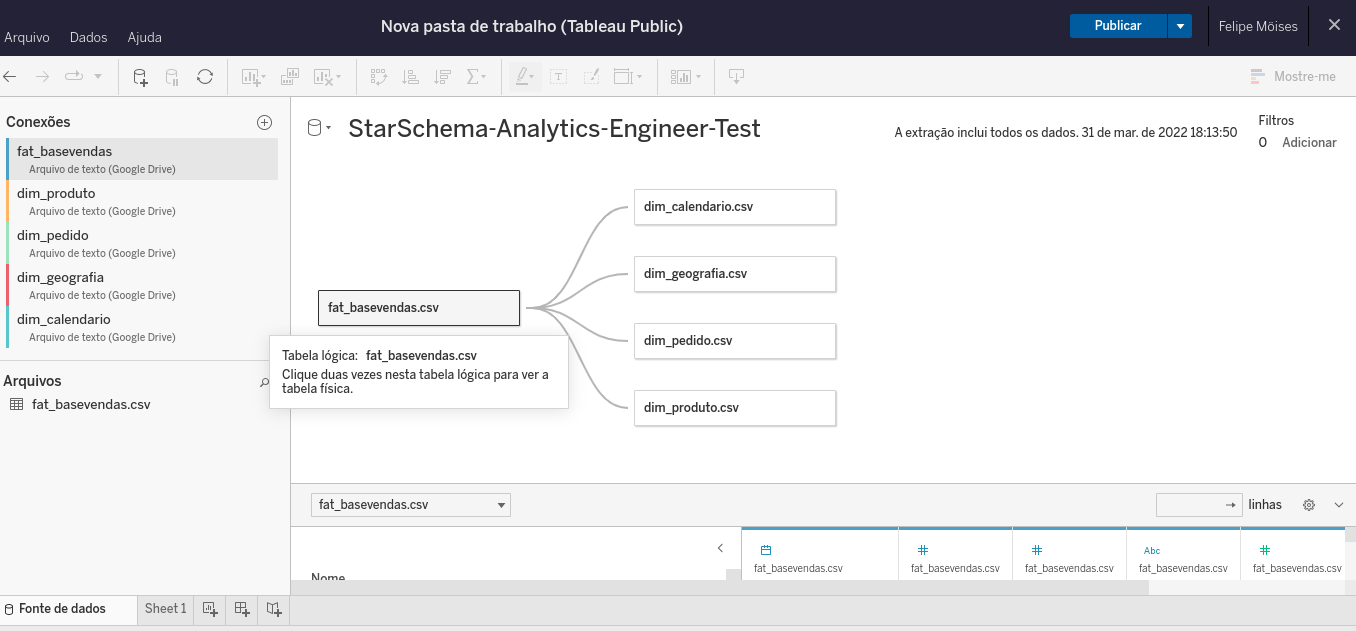

Conforme dicionário de variáveis criados na etapa B2, um dos primeiros passos a ser executado é o estudo e levantamento dos requisitos necessários para a construção do produto final. Identificamos assim as principais partes e objetos envolvidos, suas possíveis ações e responsabilidades, suas características e como elas interagem entre si.

Neste caso, fizemos o uso do Modelo Entidade Relacionamento (também chamado Modelo ER, ou simplesmente MER), que por sua vez, como o nome sugere, é um modelo conceitual utilizado na Engenharia de Software para descrever os objetos (entidades) envolvidos em um domínio de negócios, com suas características (atributos) e como elas se relacionam entre si (relacionamentos).

### **E3. Dashboard de Vendas no Tableau Online**

Acessando o link abaixo, podemos navegar pelo dashboard desenvolvido.

O dashboard possui foco nos valores de Receita Total do período, sendo explorado este indicador entre as suas dimensões de tempo, canal, categoria, região e pedido.


> **[Tableau | Analytics-Engineer-Test-Ecommerce2](https://public.tableau.com/views/Analytics-Engineer-Test-Ecommerce2/Painel1?:language=pt-BR&:display_count=n&:origin=viz_share_link)**

Por fim, vale ressaltar que os filtros são aplicado de forma dinâmica dentre os gráficos, aumentando ainda mais a possibilidade de visualizações por parte do usuário.

Abaixo temos um panorama estático do que temos de forma interativa no link acima.




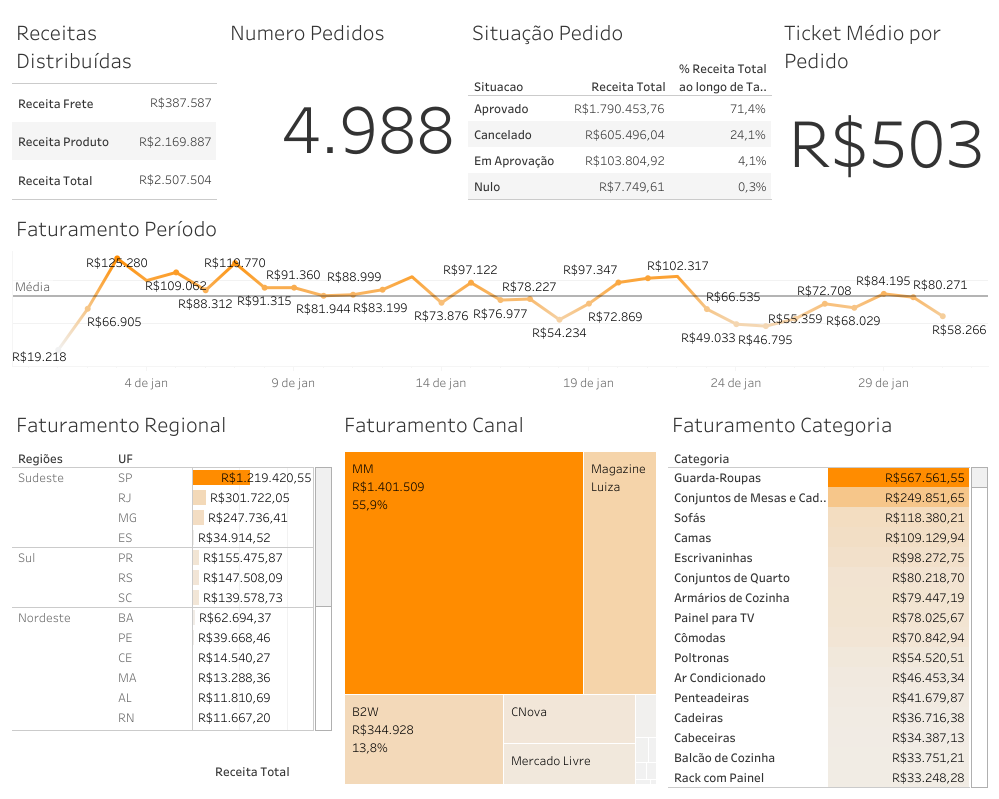

## **F. Insights**

Nesta etapa, iremos apontar alguns insights que surgiram ao analisar a base de dados fornecida a fim de ajudar o time de negócio em suas tomadas de decisão.

### **F1. Data Quality e Governança de Dados**

Ao explorar e entender a base de dados fornecida, nota-se pequenas inconsistências nos dados de entrada.

Categorias não discriminadas, produtos sem id e descrição, categorias com preenchimento '-,' e até mesmo produtos vendidos por metro apontados no mesmo campo que é contabilizados produtos que são vendidos por unidade/caixa são exemplos de inconsistências que podem influenciar nas análises de negócio.

Mesmo que consigamos mitigar através do ETL isto, estas inconsistências devem ser tratadas através do entendimento do fluxo de cadastro e padronização de nomenclaturas, para que assim tenhamos não só a visibilidade dos cadastros mas também que estes cadastros auxiliem nas decisões de negócio em análises, sem desvios, viéses ou perdas de informação.

### **F2. Pedidos Cancelados**


No período que compreende o *dataset*, encontramos 24% dos pedidos cancelados com picos de cancelamento nos dias 05 e 21, onde 73% destes pedidos foram realizados diretamente pelo canal MM.

Coincidentemente, no Brasil, a maioria das empresas realizam o depósito de salário nos dias 1, 15 e 30 de cada mês, o que por sua vez pode nos inferir que as compras realizadas via boleto podem ter vencimentos por volta dos dias 05 e 20, os picos de cancelamento.

De forma tática, podemos auxiliar o time responsável por CRM (e-mail marketing) a criar uma abordagem diferente nos lembretes de vencimento de boletos realizados nesta data, a fim de diminuir o número de cancelamentos de pedidos oriundos do canal MM.

### **F3. Itens de Escritório, teletrabalho e o estoque**

Podemos notar que a venda dos dois itens de produtos de escritório (escrivaninha e cadeira para escritório) perfaz 5% do montante total para o período analisado, onde o produto escrivaninha figura o TOP 5 de produtos mais vendidos no período.

Com a chegada da pandemia e a modalidade de teletrabalho difundida globalmente, os itens supracitados são cada vez mais buscados no varejo.

Diante deste cenário, há uma oportunidade para ofertar os itens menos vendidos destas categorias em combos, assim como encontramos o item Sala de Jantar (combo mesa + cadeiras).

Visto a gama de produtos no portfólio MM, este combo escritório poderia ser sazonal e de acordo com o giro do estoque, onde ao analisar o giro de estoque de produtos com vendas baixas, os itens combinados poderiam ser impulsionados na venda em conjunto. Além, claro, de ofertá-los de forma unitária como já vem sendo feito.

Sendo assim, explorando este racional, os produtos poderiam ter suas vendas impulsionadas, assim como diminuir os itens parados em estoque.

## **Conclusões**

Foi feita apenas uma análise superficial na base de dados da MM, porém já é possível perceber que existem pequenas inconsistências na base de dados em algumas das variáveis.

Também é notável que há oportunidades a serem exploradas no âmbito, como aferição do processo de ingestão de dados, assim como outros insights relativos ao negócio e retornos em si.

Por fim, vale destacar que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Optei por abordar indicadores relativos a Receita Total para esta primeira análise, porém há possibilidade de explorar ainda mais outros indicadores.

## **Referências**

MadeiraMadeira- Site. https://www.madeiramadeira.com.br/. Acesso em 30/03/2022.

Wikipedia - MadeiraMadeira. https://pt.wikipedia.org/wiki/MadeiraMadeira.Acesso em 30/03/2022.

Conversion. https://www.conversion.com.br/blog/ranking-ecommerces/. Acesso em 30/03/2022. 

DevMdeia - Modelo Entidade Relacionamento. https://www.devmedia.com.br/mer-e-der-modelagem-de-bancos-de-dados/14332

P. Chapman, J. Clinton, R. Kerber, T. Khabaza, T. Reinartz, C. Shearer, and R. Wirth, “Crisp–dm 1.0 step-by-step data mining guide” 2000.

Cole Nussbaumer Knaflic, “Storytelling com dados: Um guia sobre visualização de dados para profissionais de negócios” 2019.

